<h1>Exercise set 2: Eulers Method (04/10 - 08/10)</h1>

Given an initial condition, what is the exact solution of a model? That is the question we're trying to solve in these exercises. A powerful tool for this is Eulers method. In Eulers method, we take a starting point. To this starting point we add a very small amount along the tangential vector. After doing this a sufficient amount of times, with a small enough step, we get a very good approximation of the actual solution. This method can also be written as the following equation:
\begin{equation*}
    X_{new} = X_{old} + \Delta t \cdot X'
\end{equation*}


In [2]:
"""
imports
"""

import numpy as np                 # math
import matplotlib.pyplot as plt    # plotting
from ipywidgets import interact    # interactivity
import ipywidgets as widgets       # widgets

We start by imlpementing general functions that implement the Euler method. We use different functions for problems with a different amount of variables and equations since it's best to do the euler method for all the equations at the same time.

In [3]:
"""
General functions
"""

def euler_int_single(x, step, t, func_x, y_min):
    """
    function implementing the euler method
    for integrating a function with a single
    variable.
    """
    for i in range(0, t-1):
        if (x[i] <= y_min - 15):
            x[i + 1] = y_min - 15
        else:
            x[i + 1] = x[i] + step * func_x(x[i])
        

def euler_int_double(x, y, step, t, func_x, func_y):
    """
    function implementing the euler method
    for integrating a function with 2 variables
    """
    for i in range(0, t-1):
        x[i + 1] = x[i] + step * func_x(x[i], y[i])
        y[i + 1] = y[i] + step * func_y(x[i], y[i])
        

def euler_int_triple(x, y, z, step, t, func_x, func_y, func_z):
    """
    function implementing the euler method
    for integrating a function with 3 variables
    """
    for i in range(0, t-1):
        x[i + 1] = x[i] + step * func_x(x[i], y[i], z[i])
        y[i + 1] = y[i] + step * func_y(x[i], y[i], z[i])
        z[i + 1] = z[i] + step * func_z(x[i], y[i], z[i])
        
        
def euler_int_quadrupel(x, y, z, w, step, t, func_x, func_y, func_z, func_w):
    """
    function implementing the euler method
    for integrating a function with 2 variables
    """
    for i in range(0, t-1):
        x[i + 1] = x[i] + step * func_x(x[i], y[i], z[i], w[i])
        y[i + 1] = y[i] + step * func_y(x[i], y[i], z[i], w[i])
        z[i + 1] = z[i] + step * func_z(x[i], y[i], z[i], w[i])
        w[i + 1] = w[i] + step * func_w(x[i], y[i], z[i], w[i])

<h2>Exercise 2.1: Shark-Tuna model</h2>
There is a population of prey (the tuna) and hunters (the sharks). Their populations are dependent on each other and are influenced by feedback.
The change of the population of tuna (T) and sharks (S) can be described by the following equations:

\begin{align*}
    T′&= 0.5T −0.01ST \\
    S′&= 0.005ST −0.2S
\end{align*}

We will model their population as a vector field using numpy and matplotlib. We will also describe the path in that vector field that a given set of initial conditions will create. Finally we will plot how the populations will behave over time.

We start by creating the grid for the vector plot, calculating the size of the vectors and normalizing them. We will show the magnitude of the vector using colour, not size.

Then we plot all the data. We use subplots to show both the path a certain set of initial conditions gives rise to and the behaviour over time. We use widgets to make the plot interactive. You can change the initial conditions with the sliders.

In [4]:
"""
Shark and tuna data and functions
"""

def tuna_func(t, s):
    return 0.5*t - 0.01*t*s


def shark_func(t, s):
    return 0.005*s*t - 0.2*s

step_ST = 0.001
size_ST = 50000

# create data for the shark and tuna
T, S = np.meshgrid(np.linspace(0, 150, 25), np.linspace(0, 150, 25))
dT = tuna_func(T, S)
dS = shark_func(T, S)

# normalise the vector size and make sure there
# are no zero values
N = np.hypot(dT, dS)
N[N == 0] = 1
T_Normal = dT / N
S_Normal = dS / N

# create empty arrays for the euler method data
T_euler = np.zeros(size_ST)
S_euler = np.zeros(size_ST)

# create the data for the time axis
t = np.array(range(size_ST))

interactive(children=(IntSlider(value=10, description='t_start', max=75), IntSlider(value=40, description='s_s…

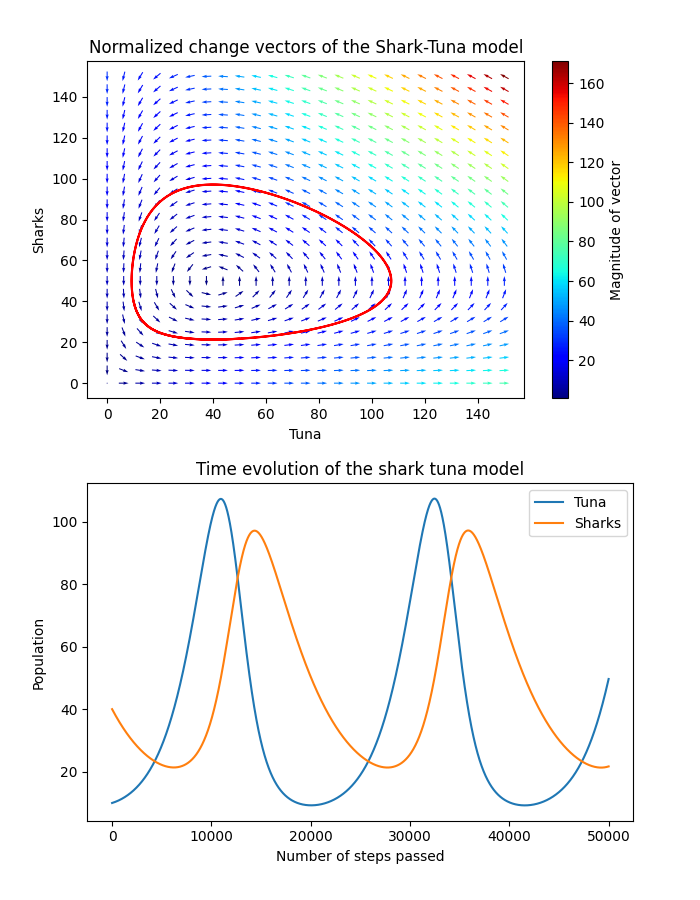

In [5]:
"""
Shark and tuna plotting
"""

%matplotlib widget
# create subplots and change spacing between them
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 9))
fig.tight_layout(pad=4.0)

# set colorbar, data and labels for the vector plot
vector = axes[0].quiver(T, S, T_Normal, S_Normal, N, cmap='jet', pivot = 'mid')
cbar = plt.colorbar(vector, ax=axes[0]).set_label("Magnitude of vector")
axes[0].set_title('Normalized change vectors of the Shark-Tuna model')
axes[0].set_xlabel("Tuna")
axes[0].set_ylabel("Sharks")

# plot the path a given set of initial conditions will create
line, = axes[0].plot(T_euler, S_euler, color='red')

# create plots for both the shark and tuna population over time
tuna_timedelta, = axes[1].plot(t, T_euler, label='Tuna')
sharks_timedelta, = axes[1].plot(t, S_euler, label='Sharks')
axes[1].legend()
axes[1].set_xlabel('Number of steps passed')
axes[1].set_ylabel('Population')
axes[1].set_title('Time evolution of the shark tuna model')

@widgets.interact(t_start=(0, 75, 1), s_start=(0, 75, 1))
def update_shark_tuna(t_start = 10, s_start=40):
    """
    A function that will dynamically change the data for
    the path in the vector field. It will also change the
    data for the evolution of the population.
    """
    
    # create the x and y data for the path in the vectorplot
    T_euler[0] = t_start
    S_euler[0] = s_start
    euler_int_double(T_euler, S_euler, step_ST, size_ST, tuna_func, shark_func)
    
    # update the path data
    line.set_xdata(T_euler)
    line.set_ydata(S_euler)
    
    # update the time evolution data
    tuna_timedelta.set_ydata(T_euler)
    sharks_timedelta.set_ydata(S_euler)
    
    # recompute the ax.dataLim
    axes[1].relim()
    # update ax.viewLim using the new dataLim
    axes[1].autoscale_view()
    
    fig.canvas.draw()
    fig.canvas.flush_events()

If the step size is set too large the plots start and end won't be in the same position. If you increase the number of steps enough this will give rise to a spiral. The step size should be much smaller than the range of the data. In our case it's about 1000 times smaller.

If we look at the population over time we see that the shark population lags behind the tuna population. The tuna population will first increase, then the sharks follow. When there are too many sharks the tuna population starts decreasing and only later the shark population will start to decrease.

<h2>Exercise 2.2: The frictionless spring</h2>

We consider the following dynamical system:
\begin{align*}
    X′&= V \\
    V′&= -kX
\end{align*}

This represents the equations of motion for a frictionless spring. We will examine how it evolves over time. The computational methods used are completely analogous to the ones used in the first exercise.

In [6]:
"""
Frictionless spring data and functions
"""

k = 0.25
size_spring = 2000

def spring_dX(x, v):
    return v

def spring_dV(x, v):
    return -k*x

X, V = np.meshgrid(np.linspace(-1000, 1000, 25), np.linspace(-500, 500, 40))
dX = spring_dX(X, V)
dV = spring_dV(X, V)

M = np.hypot(dX, dV)
M[M == 0] = 1
X_Normal = dX / M
V_Normal = dV / M

X_euler = np.zeros(size_spring)
V_euler = np.zeros(size_spring)

interactive(children=(IntSlider(value=70, description='x_start', max=75), IntSlider(value=40, description='v_s…

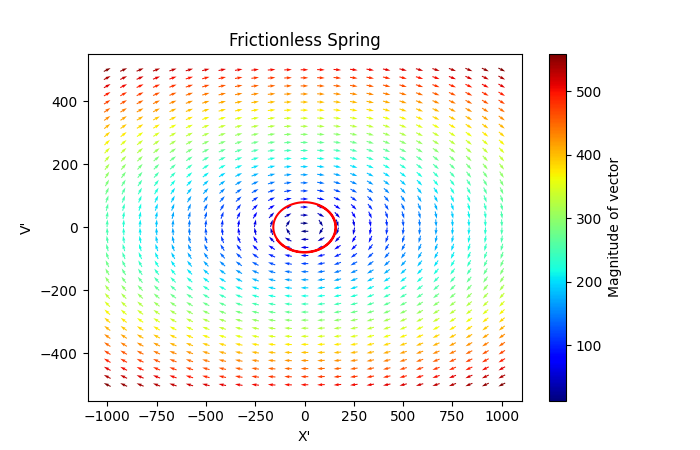

In [14]:
"""
Frictionless spring plotting
"""

%matplotlib widget
# create subplots and change spacing between them
fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=(7, 4.5))

# set colorbar, data and labels for the vector plot
vector2 = axes2.quiver(X, V, X_Normal, V_Normal, M, cmap='jet', pivot = 'mid')
cbar = plt.colorbar(vector2, ax=axes2).set_label("Magnitude of vector")
axes2.set_title('Frictionless Spring')
axes2.set_xlabel("X'")
axes2.set_ylabel("V'")

# plot the path a given set of initial conditions will create
line2, = axes2.plot(X_euler, V_euler, color='red')

@widgets.interact(x_start=(0, 75, 1), v_start=(0, 75, 1), step_spring=(0.01, 0.2, 0.01))
def update_spring(x_start = 70, v_start=40, step_spring=0.01):
    """
    A function that will dynamically change the data for
    the path in the vector field. It will also change the
    data for the evolution of the population.
    """
    
    # create the x and y data for the path in the vectorplot
    X_euler[0] = x_start
    V_euler[0] = x_start
    euler_int_double(X_euler, V_euler, step_spring, size_spring, spring_dX, spring_dV)
    
    # update the path data
    line2.set_xdata(X_euler)
    line2.set_ydata(V_euler)
    
    fig.canvas.draw()
    fig.canvas.flush_events()

We found the ideal step size is $0.01$. If we make this larger, the path will start to spiral because the starting point and end point don't meet. The bigger the step size is, the larger the space between the spirals.

<h2>Exercise 2.3: The logistic equation</h2>

We consider the following equation:
\begin{equation*}
    X' = 0.05X \cdot \left( 1 - \frac{X}{100} \right)
\end{equation*}

This represents the logistic equation. We will examine this equation and discuss the results. Once again the computational methods are similar to the ones in the previous exercises. This time however, there is only one equation, so instead of creating a vector plot and showing the path it takes given an initial condition, we will plot the equation in function of time. We will also determine how the initial conditions will change the graph.

In [8]:
"""
Logistics equation data and functions
"""

def logistics_func(x):
    """Logistics equation"""
    return 0.05*x*(1 - x / 100)


# constants
size_logistic = 250
steps_logistic = 0.4

# init arrays
time_log = np.array(range(size_logistic))
euler_log = np.zeros(size_logistic)

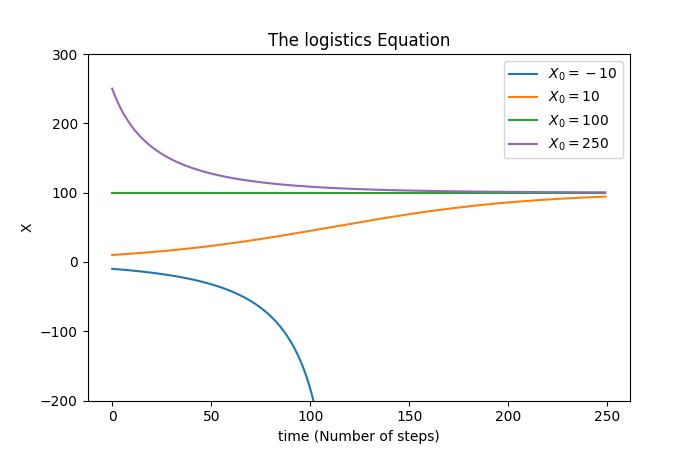

In [9]:
# init plot and set limits on y axis
_, ax_log = plt.subplots(nrows=1, ncols=1, figsize=(7, 4.5))
ymin = -200
ymax = 300
ax_log.set_ylim(ymin, ymax)

# case 1: x_0 < 0
euler_log[0] = -10
euler_int_single(euler_log, steps_logistic, size_logistic, logistics_func, ymin)
ax_log.plot(time_log, euler_log, color='tab:blue', label='$X_0 = {}$'.format(int(euler_log[0])))

# case 2: x_0 > 0
euler_log[0] = 10
euler_int_single(euler_log, steps_logistic, size_logistic, logistics_func, ymin)
ax_log.plot(time_log, euler_log, color='tab:orange', label='$X_0 = {}$'.format(int(euler_log[0])))

# case 3: x_0 = 100
euler_log[0] = 100
euler_int_single(euler_log, steps_logistic, size_logistic, logistics_func, ymin)
ax_log.plot(time_log, euler_log, color='tab:green', label='$X_0 = {}$'.format(int(euler_log[0])))

# case 3: x_0 > 100
euler_log[0] = 250
euler_int_single(euler_log, steps_logistic, size_logistic, logistics_func, ymin)
ax_log.plot(time_log, euler_log, color='tab:purple', label='$X_0 = {}$'.format(int(euler_log[0])))

# add labels and legend
ax_log.set_xlabel('time (Number of steps)')
ax_log.set_ylabel('X')
ax_log.set_title('The logistics Equation')
ax_log.legend()

This equation can have 4 different behaviours which can be seen in the graph above. We will now discuss those.
<ol>
  <li> <b>$x_0 < 0$</b>: </li>
    If the starting value is smaller then 0, the graph will decrease to $-\infty$. The decrease is proportional with a power law of $x^2$
    
  <li> <b>$0 < X_0 < 100$</b>: </li>
    If the starting value lies between 0 and 100, the graph will have an asymptote at $X'=100$.
    
  <li> <b>$x_0 = 100$</b>: </li>
    If the starting value is equal to 100, we find that the equation for $X'$ always yields 0. This means that the value of $X'$ will always be constant at $X_0 = 100$.
    
  <li> <b>$x_0 > 100$</b>:</li>
    Finally, if the starting value is greater than 100, their will also be an asymptote at $X'=100$, similar to the second case.
</ol> 

<h2>Exercise 2.4: Epidemics</h2>
<h3>Exercise 2.4.1: The SIR model</h3>

We will try to model an epidemic using the SIR model. This model has 3 important variables:
<ol>
  <li> <b>S</b>: The variable S represents the number of <b>susceptible</b> people.</li> 
  <li> <b>I</b>: The variable I represents the number of <b>infected</b> people.</li>
  <li> <b>R</b>: The variable R represents the number of <b>recovered</b> people.</li>
</ol>

We can then model an epidemic using the following equations:
\begin{align*}
    \frac{dS}{dt} &= -\beta \frac{S \cdot I}{N} \\
    \frac{dI}{dt} &= \beta \frac{S \cdot I}{N} - \gamma I \\
    \frac{dR}{dt} &= \gamma I
\end{align*}

In these equation there are three more constants. The first one is $N$. $N$ represents the total population, which in our case is $N=10000$. Then we also have the constant $\beta$. This constant represents the infection rate, or in other words the chance that someone gets infected when a susceptible person meets an infected person. In this model we will use $\beta = 0.7$. Finally we have the constant $\gamma$. This constant represents how long someone is infected. In our case an infected person will stay infected for 5 days, thus $\gamma = \frac{1}{5}$.

The methods we're using are similar to those in the previous exercises. We are only interested in the evolution of the three different populations over time, so we only need to use the Euler method and plot the results. We will start the model with 1 infected person.

In [10]:
"""
constants and general functions
"""
# use globals so we can change them later inside 
# the update function for the dynamic plot
global beta_sir, gamma_sir

# define the constants
beta_sir = 0.7
gamma_sir = 0.25
n_sir = 10000
size_sir = 750
step_sir = 0.1


# create functions for the different variables
def sir_S(s, i, r):
    return -beta_sir*s*i / n_sir


def sir_I(s, i, r):
    return beta_sir*s*i / n_sir - gamma_sir*i


def sir_R(s, i, r):
    return gamma_sir*i


# init arrays
time_sir = np.array(range(size_sir))
euler_sir_S = np.zeros(size_sir)
euler_sir_I = np.zeros(size_sir)
euler_sir_R = np.zeros(size_sir)
euler_sir_S[0] = 9999
euler_sir_I[0] = 1
euler_sir_R[0] = 0

interactive(children=(FloatSlider(value=0.7, description='b', max=1.0, min=0.01, step=0.05), FloatSlider(value…

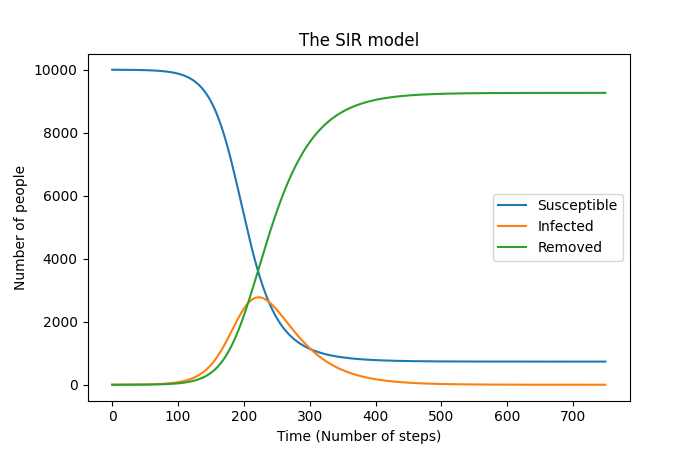

In [11]:
"""
SIR model plotting
"""
%matplotlib widget
# init plot and set limits on y axis
_, ax_sir = plt.subplots(nrows=1, ncols=1, figsize=(7, 4.5))

# plot the curves for dS, dI and dR
line_sir_S, = ax_sir.plot(time_sir, euler_sir_S, color='tab:blue', label='Susceptible')
line_sir_I, = ax_sir.plot(time_sir, euler_sir_I, color='tab:orange', label='Infected')
line_sir_R, = ax_sir.plot(time_sir, euler_sir_R, color='tab:green', label='Removed')

# add labels and legend
ax_sir.set_xlabel('Time (Number of steps)')
ax_sir.set_ylabel('Number of people')
ax_sir.set_title('The SIR model')
ax_sir.legend()

@widgets.interact(b=(0.01, 1, 0.05), g=(0.01, 1, 0.05))
def update_sir(b=0.7, g=0.25):
    """
    A function that will dynamically change the constants used
    in the SIR model.
    """
    # declare that we want to target the variables
    # from the global scope, not the local scope of
    # the function
    global beta_sir, gamma_sir
    beta_sir = b
    gamma_sir = g
    
    # update the results of the Euler method with new variables
    euler_int_triple(euler_sir_S, euler_sir_I, euler_sir_R,
                step_sir, size_sir,
                sir_S, sir_I, sir_R)
    
    # update the y data of the plots
    line_sir_S.set_ydata(euler_sir_S)
    line_sir_I.set_ydata(euler_sir_I)
    line_sir_R.set_ydata(euler_sir_R)
    
    fig.canvas.draw()
    fig.canvas.flush_events()

We start of by calculation the basic reproduction rate:
\begin{align*}
    R_0 &= \frac{\beta}{\gamma} \\
        &= \frac{0.7}{0.2} \\
        &= 3.5
\end{align*}

The peak of the infected people is at around 2700 people infected after around 220 steps.

<h3>Exercise 2.4.2: The SIER model</h3>

The SIER model is very similar to the SIR model, except there is an extra variable E. This variable represents the exposed people (i.e. the people that have the virus, but cannot yet infect other people). This leads to a new set of equations:

\begin{align*}
    \frac{dS}{dt} &= -\beta \frac{S \cdot I}{N} \\
    \frac{dE}{dt} &= \beta \frac{S \cdot I}{N} - \alpha E \\
    \frac{dI}{dt} &= \alpha E - \gamma I \\
    \frac{dR}{dt} &= \gamma I
\end{align*}

This model also introduces a new constant $\alpha$. This represents the incubation period. In our case we have an incubation period of 5 days. We will also use different values for $\beta$ and $\gamma$ than we used in the SIR model. This time the constants are: 
$\alpha = 0.2$,
$\beta = 0.266$ and
$\gamma = 1 / 14$

The script is very similar to that for the SIR model, except for the fact that there is an extra equations.

In [12]:
"""
constants and general functions
"""
# declare the constants as globals
global alpha_sier, beta_sier, gamma_sier

# define all of the constants.
alpha_sier = 1/5
beta_sier = 0.266
gamma_sier = 1/14
n_sier = 1000000
size_sier = 3000
step_sier = 0.1

# define all of the functions for the different variables
def sier_S(s, e, i, r):
    return -beta_sier*s*i / n_sier

def sier_E(s, e, i, r):
    return beta_sier*s*i / n_sier - alpha_sier*e


def sier_I(s, e, i, r):
    return alpha_sier*e - gamma_sier*i


def sier_R(s, e, i, r):
    return gamma_sier*i


# init arrays
time_sier = np.array(range(size_sier))
euler_sier_S = np.zeros(size_sier)
euler_sier_E = np.zeros(size_sier)
euler_sier_I = np.zeros(size_sier)
euler_sier_R = np.zeros(size_sier)
euler_sier_S[0] = 1000000 - 1
euler_sier_E[0] = 1
euler_sier_I[0] = 1
euler_sier_R[0] = 0

interactive(children=(FloatSlider(value=0.2, description='a', max=1.0, min=0.01, step=0.05), FloatSlider(value…

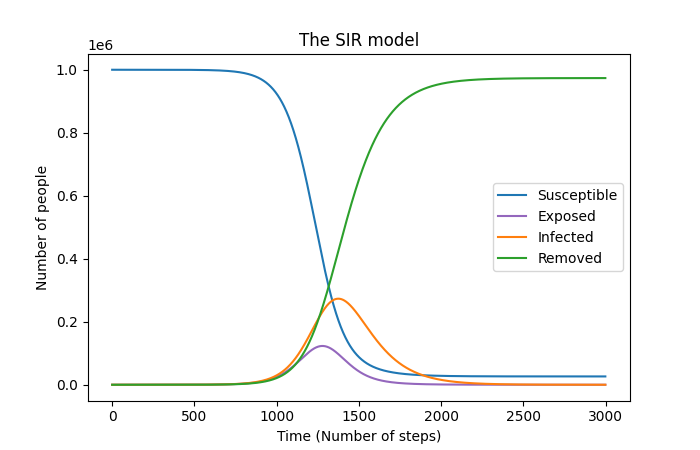

In [13]:
"""
SIR model plotting
"""
%matplotlib widget
# init plot and set limits on y axis
_, ax_sier = plt.subplots(nrows=1, ncols=1, figsize=(7, 4.5))

# Susceptible
line_sier_S, = ax_sier.plot(time_sier, euler_sier_S, color='tab:blue', label='Susceptible')
line_sier_E, = ax_sier.plot(time_sier, euler_sier_I, color='tab:purple', label='Exposed')
line_sier_I, = ax_sier.plot(time_sier, euler_sier_I, color='tab:orange', label='Infected')
line_sier_R, = ax_sier.plot(time_sier, euler_sier_R, color='tab:green', label='Removed')

# add labels and legend
ax_sier.set_xlabel('Time (Number of steps)')
ax_sier.set_ylabel('Number of people')
ax_sier.set_title('The SIR model')
ax_sier.legend()

@widgets.interact(a=(0.01, 1, 0.05), b=(0.01, 1, 0.05), g=(0.01, 1, 0.05))
def update_sier(a=0.2, b=0.266, g=1/14):
    """
    A function that will dynamically change the constants used
    in the SIR model.
    """
    # target the global variables
    global alpha_sier, beta_sier, gamma_sier
    
    # update the variables
    alpha_sier = a
    beta_sier = b
    gamma_sier = g
    
    # update the data
    euler_int_quadrupel(euler_sier_S, euler_sier_E, euler_sier_I, euler_sier_R,
                step_sier, size_sier,
                sier_S, sier_E, sier_I, sier_R)
    
    # update the plot
    line_sier_S.set_ydata(euler_sier_S)
    line_sier_E.set_ydata(euler_sier_E)
    line_sier_I.set_ydata(euler_sier_I)
    line_sier_R.set_ydata(euler_sier_R)
    
    fig.canvas.draw()
    fig.canvas.flush_events()

When we play around with the value for $\beta$, the infection rate, we see that a higher infection rate leads to a higher peak, but this also means that the number of infected people falls to zero rather quickly. If we have a smaller value for $\beta$, which can for example be achieved by social distancing, then we will get a much flatter curve, but the epidemic will be around longer. We want to have $\beta$ in such a way that the maximum number of infected people always stays below the capacity of the healthcare system.

There are however some limitations to this model. For example, it doesn't take into account the following things
 <ul>
  <li> There is a possibility that people die from the infection (N decreases); </li>
  <li> People can also get immunity, and thus belong to the recovered group, by vaccinating; </li>
  <li> This model doesn't take into account the fact that people might be able to be infected multiple times; </li>
  <li> People might actually be able to infect people in the incubation period; </li>
  <li> People may not be infectious anymore after some time, even if they are still sick. </li>
</ul>

And there are many more variables that we can take into account.